# Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [25]:
import pandas as pd
import numpy as np

In [5]:
bank = pd.read_csv("C:/Users/Admin/Downloads/bank-full.csv")

In [6]:
bank.head()

,age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Exploratory Data Analysis

In [9]:
bank.isnull().sum()

age            0
"job"          0
"marital"      0
"education"    0
"default"      0
"balance"      0
"housing"      0
"loan"         0
"contact"      0
"day"          0
"month"        0
"duration"     0
"campaign"     0
"pdays"        0
"previous"     0
"poutcome"     0
"y"            0
dtype: int64

In [21]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['"job"','"marital"','"education"','"contact"','"poutcome"','"month"'])
data1



,age,"""default""","""balance""","""housing""","""loan""","""day""","""duration""","""campaign""","""pdays""","""previous""",...,"""month""_""dec""","""month""_""feb""","""month""_""jan""","""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep"""
0,58,"""no""",2143,"""yes""","""no""",5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,"""no""",29,"""yes""","""no""",5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,"""no""",2,"""yes""","""yes""",5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,"""no""",1506,"""yes""","""no""",5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,"""no""",1,"""no""","""no""",5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""no""",825,"""no""","""no""",17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,"""no""",1729,"""no""","""no""",17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,"""no""",5715,"""no""","""no""",17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,"""no""",668,"""no""","""no""",17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,"""default""","""balance""","""housing""","""loan""","""day""","""duration""","""campaign""","""pdays""","""previous""","""y""","""job""_""admin.""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""","""job""_""management""","""job""_""retired""","""job""_""self-employed""","""job""_""services""","""job""_""student""","""job""_""technician""","""job""_""unemployed""","""job""_""unknown""","""marital""_""divorced""","""marital""_""married""","""marital""_""single""","""education""_""primary""","""education""_""secondary""","""education""_""tertiary""","""education""_""unknown""","""contact""_""cellular""","""contact""_""telephone""","""contact""_""unknown""","""poutcome""_""failure""","""poutcome""_""other""","""poutcome""_""success""","""poutcome""_""unknown""","""month""_""apr""","""month""_""aug""","""month""_""dec""","""month""_""feb""","""month""_""jan""","""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep"""
0,58,"""no""",2143,"""yes""","""no""",5,261,1,-1,0,"""no""",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,"""no""",29,"""yes""","""no""",5,151,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,"""no""",2,"""yes""","""yes""",5,76,1,-1,0,"""no""",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,"""no""",1506,"""yes""","""no""",5,92,1,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,"""no""",1,"""no""","""no""",5,198,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""no""",825,"""no""","""no""",17,977,3,-1,0,"""yes""",0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,"""no""",1729,"""no""","""no""",17,456,2,-1,0,"""yes""",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,"""no""",5715,"""no""","""no""",17,1127,5,184,3,"""yes""",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,"""no""",668,"""no""","""no""",17,508,4,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [28]:
# Custom Binary Encoding of Binary o/p variables 
data1['"default"'] = np.where(data1['"default"'].str.contains("yes"), 1, 0)
data1['"housing"'] = np.where(data1['"housing"'].str.contains("yes"), 1, 0)
data1['"loan"'] = np.where(data1['"loan"'].str.contains("yes"), 1, 0)
data1['"y"'] = np.where(data1['"y"'].str.contains("yes"), 1, 0)
data1

,age,"""default""","""balance""","""housing""","""loan""","""day""","""duration""","""campaign""","""pdays""","""previous""","""y""","""job""_""admin.""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""","""job""_""management""","""job""_""retired""","""job""_""self-employed""","""job""_""services""","""job""_""student""","""job""_""technician""","""job""_""unemployed""","""job""_""unknown""","""marital""_""divorced""","""marital""_""married""","""marital""_""single""","""education""_""primary""","""education""_""secondary""","""education""_""tertiary""","""education""_""unknown""","""contact""_""cellular""","""contact""_""telephone""","""contact""_""unknown""","""poutcome""_""failure""","""poutcome""_""other""","""poutcome""_""success""","""poutcome""_""unknown""","""month""_""apr""","""month""_""aug""","""month""_""dec""","""month""_""feb""","""month""_""jan""","""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""",default,housing,loan
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Model Building

In [30]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [32]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x,y)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Model Performance

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute accuracy score
acc_score = accuracy_score(y, y_pred)
print("Accuracy Score:", acc_score)

# Display the first 10 actual and predicted values
print("Actual Values (y):", y[:10])


Confusion Matrix:
 [[39096   826]
 [ 4052  1237]]
Accuracy Score: 0.892105903430581
Actual Values (y): 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: "y", dtype: int32


# Accuracy

In [55]:
print("Predicted Values (y_pred):", y_pred[:10])

# Display classification report
print("Classification Report:\n", classification_report(y, y_pred))

Predicted Values (y_pred): [0 0 0 0 0 0 0 0 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



AUC: 0.855211119804246


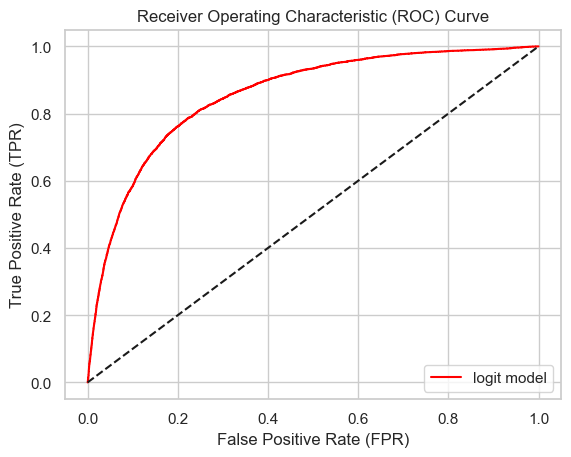

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve plotting and finding AUC value
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Calculate AUC
auc = roc_auc_score(y, classifier.predict_proba(x)[:,1])
print('AUC:', auc)

plt.show()
